In [1]:
## Load packages (installation is needed)
import pandas as pd
import datetime
#from datetime import datetime
import scipy as sp
import scipy.fftpack
from scipy import signal


import numpy as np
from numpy.fft import fft, ifft

import pymap3d as pm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#from pyproj import Proj
#from scipy.fft import fft, fftfreq

#pd.set_option('display.max_rows', None)

In [2]:
## input data


data = pd.read_csv("data/A_BIG.csv", sep=";")



data["dates"]

data['ddate'] = pd.to_datetime(data['dates'], format='%d/%m/%Y')
#data['date'] = pd.to_datetime(data.date + data.h.astype(str),format='%d/%m/%Y %H').dt.time
#data['date']
data['time'] =data['h'].astype(str) +':'+ data['min'].astype(str)+':'+data['sec'].astype(str)
data['date'] = pd.to_datetime(data['ddate'].astype(str) +' '+ data['time'].astype(str))

## set index
data = data.set_index(['date'])
data
## convert and make index to dataframwe
#time_data = "3/4/2022 12:16:25.123"
#format_data = "%d/%m/%Y"
#date = datetime.strptime(data['dates'], format_data)
#data

,code,X,Y,Z,Hz,V,S,hsta,htarg,dates,h,min,sec,ddate,time
date,,,,,,,,,,,,,,,
2022-04-03 10:14:35.870,A1,126.2513,110.7523,18.8394,75.2515,84.1735,29.2678,1.638,0,3/4/2022,10,14,35.87,2022-04-03,10:14:35.87
2022-04-03 10:14:36.250,A2,126.2504,110.7518,18.8394,75.2519,84.1729,29.2668,1.638,0,3/4/2022,10,14,36.25,2022-04-03,10:14:36.25
2022-04-03 10:14:36.840,A3,126.2504,110.7518,18.8394,75.2518,84.1730,29.2668,1.638,0,3/4/2022,10,14,36.84,2022-04-03,10:14:36.84
2022-04-03 10:14:37.350,A4,126.2494,110.7515,18.8391,75.2516,84.1731,29.2658,1.638,0,3/4/2022,10,14,37.35,2022-04-03,10:14:37.35
2022-04-03 10:14:38.520,A5,126.2495,110.7514,18.8389,75.2520,84.1734,29.2658,1.638,0,3/4/2022,10,14,38.52,2022-04-03,10:14:38.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-03 10:32:11.740,A1800,126.2506,110.7509,18.8397,75.2539,84.1722,29.2668,1.638,0,3/4/2022,10,32,11.74,2022-04-03,10:32:11.74
2022-04-03 10:32:12.300,A1801,126.2506,110.7509,18.8396,75.2539,84.1724,29.2668,1.638,0,3/4/2022,10,32,12.30,2022-04-03,10:32:12.3
2022-04-03 10:32:12.880,A1802,126.2506,110.7508,18.8398,75.2541,84.1719,29.2668,1.638,0,3/4/2022,10,32,12.88,2022-04-03,10:32:12.88


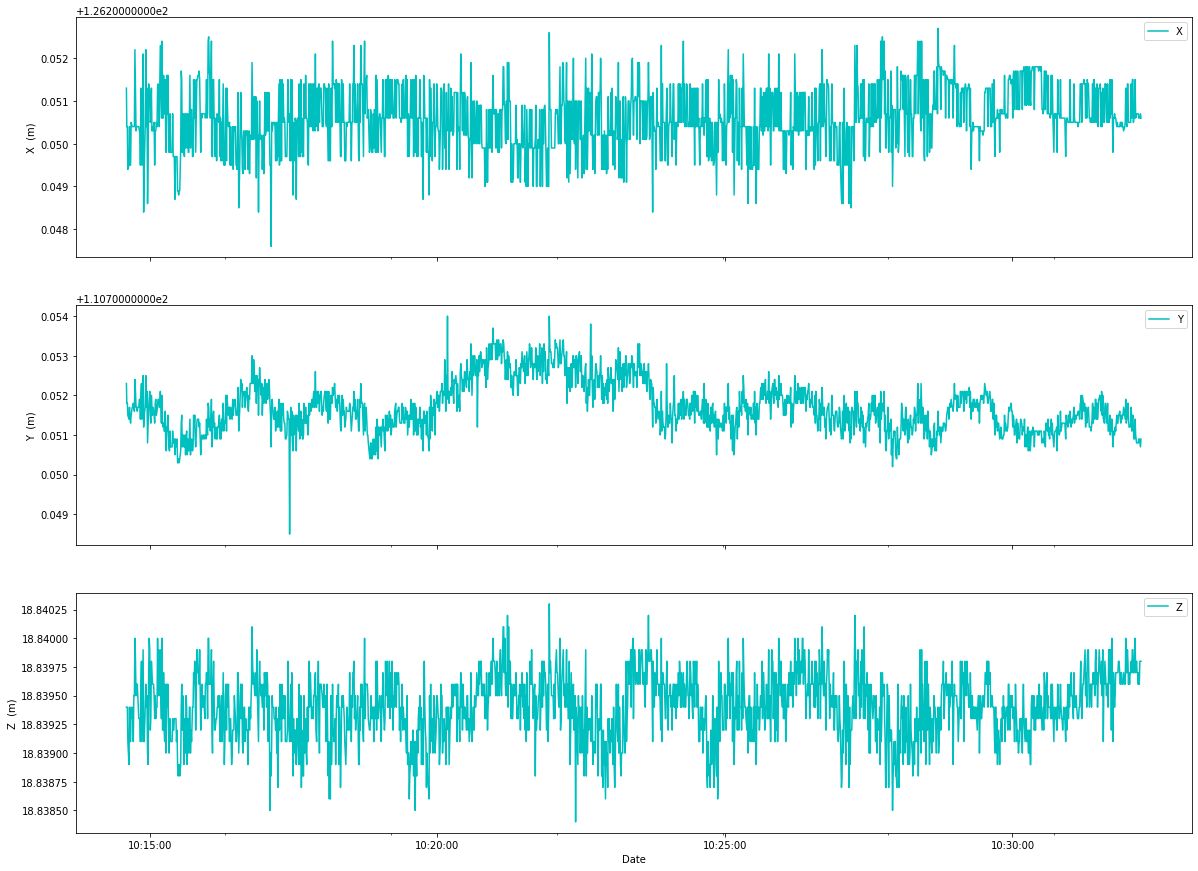

In [3]:
## make figure
#fig, ax = plt.subplots(figsize=(10, 6))
fig, axes = plt.subplots(3, 1, figsize=(20,15), sharex=True,)


plot_cols = ['X', 'Y', 'Z' ]

data[plot_cols].plot(subplots=True, ax=axes, marker=' ', color='c')

month_day_formatter = mdates.DateFormatter("%H:%M:%S")

for ax, col in zip(axes, plot_cols):
    # add axis labels
    ax.set_ylabel(col + '  (m)')
    ax.set_xlabel('Date')
    ax.xaxis.set_major_formatter(month_day_formatter)
    
fig.savefig("Outputs/ts/timeseries_A_BIG.png")

In [4]:
temp = data['Z']
N = len(temp)
#temp


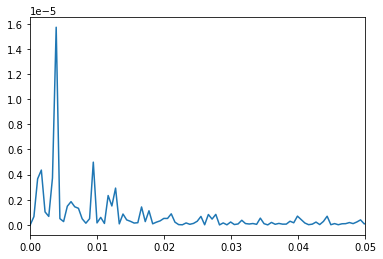

In [5]:
# Estimate power spectral density using a periodogram
f, Pxx = signal.periodogram(temp)

# lets plot this periodogram
plt.plot(f, Pxx)
plt.xlim(0, 0.05)
plt.savefig("Outputs/periodogram/periodograms_A_BIG_Z.png")

In [6]:
top_3_periods = {}

# get indices for 3 highest Pxx values
top3_freq_indices = np.flip(np.argsort(Pxx), 0)[0:3]

# use indices from previous step to
# get 3 frequencies with highest power
freqs = f[top3_freq_indices]

# use same indices to get powers as well
power = Pxx[top3_freq_indices]

# we are interested in period and it is calculated as 1/frequency 
periods = 1 / np.array(freqs)

# populate dict with calculated values
top_3_periods['period1'] = periods[0]
top_3_periods['freq1'] = freqs[0]
top_3_periods['power1'] = power[0]

top_3_periods['period2'] = periods[1]
top_3_periods['freq2'] = freqs[1]
top_3_periods['power2'] = power[1]

top_3_periods['period3'] = periods[2]
top_3_periods['freq3'] = freqs[2]
top_3_periods['power3'] = power[2]

top_3_periods

{'period1': 257.7142857142857,
 'freq1': 0.003880266075388027,
 'power1': 1.5722758980269407e-05,
 'period2': 106.11764705882352,
 'freq2': 0.009423503325942351,
 'power2': 4.992336125396669e-06,
 'period3': 601.3333333333334,
 'freq3': 0.0016629711751662971,
 'power3': 4.361230825172134e-06}

In [28]:
tempa=np.array(temp)
temp_fft = sp.fftpack.fft(tempa)
temp_psd = np.abs(temp_fft) ** 2

fftfreq = sp.fftpack.fftfreq(len(temp_psd), 1. / 601.)
#fftfreq

i = fftfreq > 0
#print(fftfreq)


In [29]:
x = list(range(len(data.index)))
y = data['Z']
# apply fast fourier transform and take absolute values
f=abs(np.fft.fft(temp))

# get the list of frequencies
num=np.size(x)
freq = [i / num for i in list(range(num))]

# get the list of spectrums
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

# plot nspectrum per frequency, with a semilog scale on nspectrum
#plt.semilogy(freq,nspectrum)


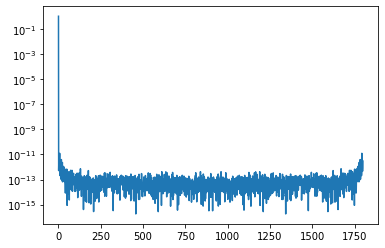

In [30]:
# improve the plot by convertint the data into grouped per week to avoid peaks
results = pd.DataFrame({'freq': freq, 'nspectrum': nspectrum})
results['period'] = results['freq'] / (1/1800)
plt.semilogy(results['period'], results['nspectrum'])
plt.savefig("Outputs/spectrume/spectrum_A_BIG_Z.png")

In [31]:
#results['period_round'] = results['period'].round()
#grouped_week = results.groupby('period_round')['nspectrum'].sum()
#plt.semilogy(grouped_week.index, grouped_week)
#plt.xticks([1, 500, 1000, 1500, 1800])

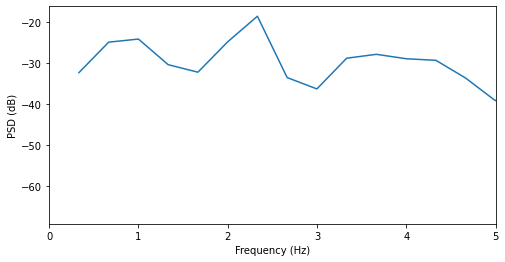

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[i], 10 * np.log10(temp_psd[i]))
ax.set_xlim(0, 5)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('PSD (dB)')
fig.savefig("Outputs/fftfreq_ts/fftfreq_A_BIG.png")

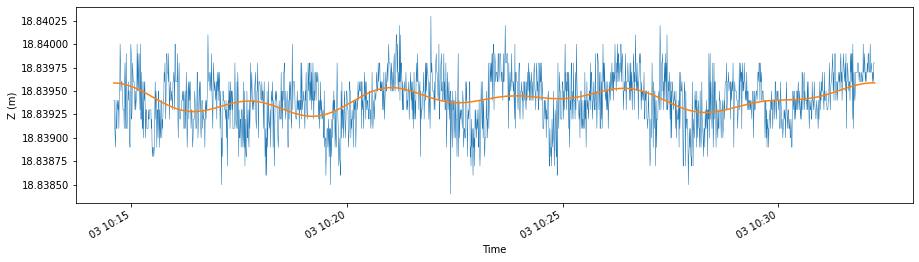

In [33]:
temp_fft_bis = temp_fft.copy()
temp_fft_bis[np.abs(fftfreq) > 2 ] = 0

date= pd.to_datetime(data.index)
temp_slow = np.real(sp.fftpack.ifft(temp_fft_bis))

fig, ax = plt.subplots(1, 1, figsize=(15, 4))
temp.plot(ax=ax, lw=.5)
ax.plot_date(date, temp_slow, '-')
#ax.set_xlim(datetime.date(1994, 1, 1),
#            datetime.date(2000, 1, 1))
#ax.set_ylim(18.838, 18.841)
ax.set_xlabel('Time')
ax.set_ylabel('Z (m)')
fig.savefig("Outputs/fftfreq_ts/ts_fftfeq_A_BIG.png")